# ARIMA modelling on Covid 19 Dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Data

In [30]:
df = pd.read_csv(r'without nan.csv')


df.head(5)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,03/13/2022,01-01-2020,01/31/2020,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,03/13/2022,02-01-2020,02/29/2020,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,03/13/2022,03-01-2020,03/31/2020,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0,NaN
3,03/13/2022,04-01-2020,04/30/2020,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0,NaN
4,03/13/2022,05-01-2020,05/31/2020,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0,NaN


# Data Preprocessing

In [31]:
df =df[(df["Age Group"] == '45-54') & (df["State"] == 'United States') &  (df["Condition Group"] == 'COVID-19') & (df["Condition"] == 'COVID-19') ]
df.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
6021,03/13/2022,01-01-2020,01/31/2020,By Month,2020,1,United States,COVID-19,COVID-19,U071,45-54,1.0,1.0,NaN
6022,03/13/2022,02-01-2020,02/29/2020,By Month,2020,2,United States,COVID-19,COVID-19,U071,45-54,2.0,2.0,NaN
6023,03/13/2022,03-01-2020,03/31/2020,By Month,2020,3,United States,COVID-19,COVID-19,U071,45-54,525.0,525.0,NaN
6024,03/13/2022,04-01-2020,04/30/2020,By Month,2020,4,United States,COVID-19,COVID-19,U071,45-54,3185.0,3185.0,NaN
6025,03/13/2022,05-01-2020,05/31/2020,By Month,2020,5,United States,COVID-19,COVID-19,U071,45-54,1711.0,1711.0,NaN


In [32]:
df = df[["Start Date","COVID-19 Deaths"]]
df.head(5)

,Start Date,COVID-19 Deaths
6021,01-01-2020,1.0
6022,02-01-2020,2.0
6023,03-01-2020,525.0
6024,04-01-2020,3185.0
6025,05-01-2020,1711.0


In [33]:
df = df.drop_duplicates(subset = ["Start Date"])
df.head(5)


,Start Date,COVID-19 Deaths
6021,01-01-2020,1.0
6022,02-01-2020,2.0
6023,03-01-2020,525.0
6024,04-01-2020,3185.0
6025,05-01-2020,1711.0


In [34]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df.sort_values(by='Start Date').head(10)

,Start Date,COVID-19 Deaths
6021,2020-01-01,1.0
6022,2020-02-01,2.0
6023,2020-03-01,525.0
6024,2020-04-01,3185.0
6025,2020-05-01,1711.0
6026,2020-06-01,1141.0
6027,2020-07-01,1997.0
6028,2020-08-01,1725.0
6029,2020-09-01,980.0
6030,2020-10-01,1040.0


In [35]:
df.drop('Start Date',axis=1,inplace=True)
df.head(10)

,COVID-19 Deaths
6021,1.0
6022,2.0
6023,525.0
6024,3185.0
6025,1711.0
6026,1141.0
6027,1997.0
6028,1725.0
6029,980.0
6030,1040.0


# Visualization

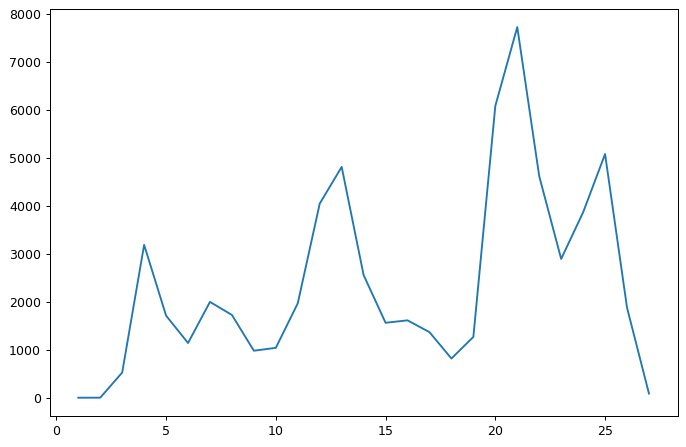

In [36]:
# df.set_index("Start Date",inplace=True)
index = pd.Index(range(1, 28))
df = df.set_index(index)
plt.plot(df)

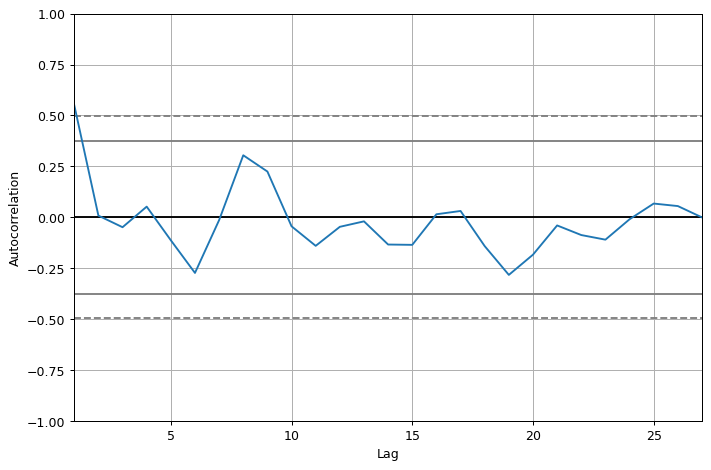

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

# ARIMA -----------> 

### Train / Validation set

In [38]:
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

In [39]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SAMEER\anaconda3\python.exe -m pip install --upgrade pip' command.


### Model Fitting and Prediction

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=311.444, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=307.368, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=304.924, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=328.862, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=306.642, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=306.439, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=308.397, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.982 seconds


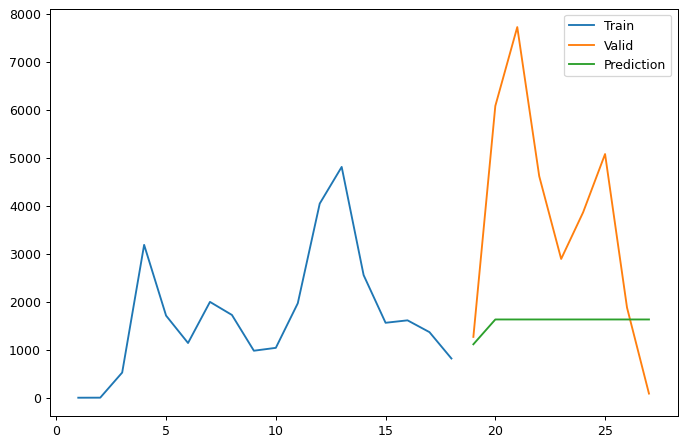

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -149.462
Date:                Thu, 24 Mar 2022   AIC                            304.924
Time:                        12:57:03   BIC                            307.595
Sample:                             0   HQIC                           305.292
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1631.0482    487.790      3.344      0.001     674.998    2587.098
ma.L1          0.7613      0.207      3.684      0.000       0.356       1.166
sigma2      9.097e+05   3.58e+05      2.542      0.0

In [41]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()
print(model_fit.summary())

### Error Calculation and ACF / PACF plots -----> 

In [42]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))

print('Test RMSE: %.4f' % rms)

Test RMSE: 3103.9193


C:\Users\SAMEER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


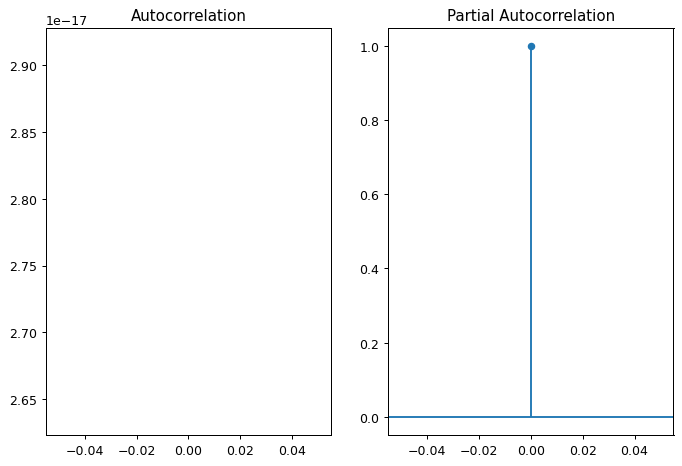

In [43]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':90})

# Import data
df = pd.read_csv(r'without nan.csv')

# Original Series
fig, axes = plt.subplots(1,2, sharex=True)
# axes[0, 0].plot(df['COVID-19 Deaths']); axes[0, 0].set_title('Original Series')

# Keeping Derivation Order as 0 ---------->

plot_acf(df['COVID-19 Deaths'], ax=axes[0])
plot_pacf(df['COVID-19 Deaths'], ax=axes[1])

# # 1st Order Differencing
# # axes[1, 0].plot(df['COVID-19 Deaths'].diff()); axes[1, 0].set_title('1st Order Differencing')
#plot_acf(df['COVID-19 Deaths'].diff().dropna(), ax=axes[1,0])
#plot_pacf(df['COVID-19 Deaths'].diff().dropna(), ax=axes[1,1])

# # 2nd Order Differencing
# # axes[2, 0].plot(df['COVID-19 Deaths'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# #plot_acf(df['COVID-19 Deaths'].diff().diff().dropna(), ax=axes[2])

# # axes[3, 0].plot(df['COVID-19 Deaths'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(df['COVID-19 Deaths'].diff().diff().dropna(), ax=axes[2,0])
#plot_pacf(df['COVID-19 Deaths'].diff().diff().dropna(), ax=axes[2,1])



plt.show()